# Python for Algorithmic Trading #

In this notebook we cover some basic techniques in algorithmic trading. 

***

## Libraries ## 

First we must import some required libraries.

In [2]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

***
## Downloading Data ##

We now import some stock data using the yfinance API. 

In [2]:
tickers = ["AAPL", "MSFT", "TSLA", "SPY"]
stocks = yf.download(tickers, start = "2020-01-01")

[*********************100%***********************]  4 of 4 completed


We can save the data as a cvs file like so:

In [3]:
stocks.to_csv("StocksAlgoTrading.csv")

***
## Reading and Writing Data

Given a csv, we can load it back in using the pandas module: 

In [4]:
stocks = pd.read_csv("StocksAlgoTrading.csv", header=[0,1])
stocks

Unnamed: 0_level_0   Adj Close                                      \
    Unnamed: 0_level_1        AAPL        MSFT         SPY        TSLA   
0                 Date         NaN         NaN         NaN         NaN   
1           2020-01-02   73.449387  156.151932  309.694946   28.684000   
2           2020-01-03   72.735298  154.207550  307.349762   29.534000   
3           2020-01-06   73.314880  154.606171  308.522369   30.102667   
4           2020-01-07   72.970085  153.196503  307.654877   31.270666   
..                 ...         ...         ...         ...         ...   
783         2023-02-09  150.639999  263.619995  407.089996  207.320007   
784         2023-02-10  151.009995  263.100006  408.040009  196.889999   
785         2023-02-13  153.850006  271.320007  412.829987  194.639999   
786         2023-02-14  153.199997  272.170013  412.640015  209.250000   
787         2023-02-15  155.330002  269.320007  413.980011  214.240005   

          Close                                            High  ...  \
           AAPL        MSFT         SPY        TSLA        AAPL  ...   
0           NaN         NaN         NaN         NaN         NaN  ...   
1     75.087502  160.619995  324.869995   28.684000   75.150002  ...   
2     74.357498  158.619995  322.410004   29.534000   75.144997  ...   
3     74.949997  159.029999  323.640015   30.102667   74.989998  ...   
4     74.597504  157.580002  322.730011   31.270666   75.224998  ...   
..          ...         ...         ...         ...         ...  ...   
783  150.869995  263.619995  407.089996  207.320007  154.330002  ...   
784  151.009995  263.100006  408.040009  196.889999  151.339996  ...   
785  153.850006  271.320007  412.829987  194.639999  154.259995  ...   
786  153.199997  272.170013  412.640015  209.250000  153.770004  ...   
787  155.330002  269.320007  413.980011  214.240005  155.500000  ...   

            Low                    Open                                      \
            SPY        TSLA        AAPL        MSFT         SPY        TSLA   
0           NaN         NaN         NaN         NaN         NaN         NaN   
1    322.529999   28.114000   74.059998  158.779999  323.540009   28.299999   
2    321.100006   29.128000   74.287498  158.320007  321.160004   29.366667   
3    320.359985   29.333332   73.447502  157.080002  320.489990   29.364668   
4    322.239990   30.224001   74.959999  159.320007  323.019989   30.760000   
..          ...         ...         ...         ...         ...         ...   
783  405.809998  204.770004  153.779999  273.799988  414.410004  207.779999   
784  405.010010  192.889999  149.460007  261.529999  405.859985  202.229996   
785  408.239990  187.610001  150.949997  267.640015  408.720001  194.419998   
786  408.510010  189.440002  152.119995  272.670013  411.239990  191.940002   
787  409.470001  206.110001  153.110001  268.320007  410.350006  211.755005   

          Volume                                       
            AAPL        MSFT         SPY         TSLA  
0            NaN         NaN         NaN          NaN  
1    135480400.0  22622100.0  59151200.0  142981500.0  
2    146322800.0  21116200.0  77709700.0  266677500.0  
3    118387200.0  20813700.0  55653900.0  151995000.0  
4    108872000.0  21634100.0  40496400.0  268231500.0  
..           ...         ...         ...          ...  
783   56007100.0  42375100.0  78694900.0  215431400.0  
784   57409100.0  25760900.0  70738000.0  204193800.0  
785   62199000.0  44630900.0  64913500.0  172475500.0  
786   61707600.0  37047900.0  88389300.0  216455700.0  
787   64561987.0  28369462.0  60496710.0  180493360.0  

[788 rows x 25 columns]

We can format the dataframe using the various inputs in the read_csv method:

In [5]:
stocks = pd.read_csv("StocksAlgoTrading.csv", header=[0,1], index_col=[0], parse_dates=[0])
stocks

Adj Close                                           Close  \
                  AAPL        MSFT         SPY        TSLA        AAPL   
Date                                                                     
2020-01-02   73.449387  156.151932  309.694946   28.684000   75.087502   
2020-01-03   72.735298  154.207550  307.349762   29.534000   74.357498   
2020-01-06   73.314880  154.606171  308.522369   30.102667   74.949997   
2020-01-07   72.970085  153.196503  307.654877   31.270666   74.597504   
2020-01-08   74.143906  155.636688  309.294617   32.809334   75.797501   
...                ...         ...         ...         ...         ...   
2023-02-09  150.639999  263.619995  407.089996  207.320007  150.869995   
2023-02-10  151.009995  263.100006  408.040009  196.889999  151.009995   
2023-02-13  153.850006  271.320007  412.829987  194.639999  153.850006   
2023-02-14  153.199997  272.170013  412.640015  209.250000  153.199997   
2023-02-15  155.330002  269.320007  413.980011  214.240005  155.330002   

                                                      High              ...  \
                  MSFT         SPY        TSLA        AAPL        MSFT  ...   
Date                                                                    ...   
2020-01-02  160.619995  324.869995   28.684000   75.150002  160.729996  ...   
2020-01-03  158.619995  322.410004   29.534000   75.144997  159.949997  ...   
2020-01-06  159.029999  323.640015   30.102667   74.989998  159.100006  ...   
2020-01-07  157.580002  322.730011   31.270666   75.224998  159.669998  ...   
2020-01-08  160.089996  324.450012   32.809334   76.110001  160.800003  ...   
...                ...         ...         ...         ...         ...  ...   
2023-02-09  263.619995  407.089996  207.320007  154.330002  273.980011  ...   
2023-02-10  263.100006  408.040009  196.889999  151.339996  264.089996  ...   
2023-02-13  271.320007  412.829987  194.639999  154.259995  274.600006  ...   
2023-02-14  272.170013  412.640015  209.250000  153.770004  274.970001  ...   
2023-02-15  269.320007  413.980011  214.240005  155.500000  270.730011  ...   

                   Low                    Open                          \
                   SPY        TSLA        AAPL        MSFT         SPY   
Date                                                                     
2020-01-02  322.529999   28.114000   74.059998  158.779999  323.540009   
2020-01-03  321.100006   29.128000   74.287498  158.320007  321.160004   
2020-01-06  320.359985   29.333332   73.447502  157.080002  320.489990   
2020-01-07  322.239990   30.224001   74.959999  159.320007  323.019989   
2020-01-08  322.670013   31.215334   74.290001  158.929993  322.940002   
...                ...         ...         ...         ...         ...   
2023-02-09  405.809998  204.770004  153.779999  273.799988  414.410004   
2023-02-10  405.010010  192.889999  149.460007  261.529999  405.859985   
2023-02-13  408.239990  187.610001  150.949997  267.640015  408.720001   
2023-02-14  408.510010  189.440002  152.119995  272.670013  411.239990   
2023-02-15  409.470001  206.110001  153.110001  268.320007  410.350006   

                           Volume                                 
                  TSLA       AAPL      MSFT       SPY       TSLA  
Date                                                              
2020-01-02   28.299999  135480400  22622100  59151200  142981500  
2020-01-03   29.366667  146322800  21116200  77709700  266677500  
2020-01-06   29.364668  118387200  20813700  55653900  151995000  
2020-01-07   30.760000  108872000  21634100  40496400  268231500  
2020-01-08   31.580000  132079200  27746500  68296000  467164500  
...                ...        ...       ...       ...        ...  
2023-02-09  207.779999   56007100  42375100  78694900  215431400  
2023-02-10  202.229996   57409100  25760900  70738000  204193800  
2023-02-13  194.419998   62199000  44630900  64913500  172475500  
2023-02-14  191.940002   617

We can convert the multi-index columns into a single index by using the following:

In [6]:
# convert mult index to one tuple
stocks.columns=stocks.columns.to_flat_index()
stocks.columns

Index([('Adj Close', 'AAPL'), ('Adj Close', 'MSFT'),  ('Adj Close', 'SPY'),
       ('Adj Close', 'TSLA'),     ('Close', 'AAPL'),     ('Close', 'MSFT'),
            ('Close', 'SPY'),     ('Close', 'TSLA'),      ('High', 'AAPL'),
            ('High', 'MSFT'),       ('High', 'SPY'),      ('High', 'TSLA'),
             ('Low', 'AAPL'),       ('Low', 'MSFT'),        ('Low', 'SPY'),
             ('Low', 'TSLA'),      ('Open', 'AAPL'),      ('Open', 'MSFT'),
             ('Open', 'SPY'),      ('Open', 'TSLA'),    ('Volume', 'AAPL'),
          ('Volume', 'MSFT'),     ('Volume', 'SPY'),    ('Volume', 'TSLA')],
      dtype='object')

Now the stocks dataframe has a different format:

In [7]:
stocks

,"(Adj Close, AAPL)","(Adj Close, MSFT)","(Adj Close, SPY)","(Adj Close, TSLA)","(Close, AAPL)","(Close, MSFT)","(Close, SPY)","(Close, TSLA)","(High, AAPL)","(High, MSFT)",...,"(Low, SPY)","(Low, TSLA)","(Open, AAPL)","(Open, MSFT)","(Open, SPY)","(Open, TSLA)","(Volume, AAPL)","(Volume, MSFT)","(Volume, SPY)","(Volume, TSLA)"
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,73.449387,156.151932,309.694946,28.684000,75.087502,160.619995,324.869995,28.684000,75.150002,160.729996,...,322.529999,28.114000,74.059998,158.779999,323.540009,28.299999,135480400,22622100,59151200,142981500
2020-01-03,72.735298,154.207550,307.349762,29.534000,74.357498,158.619995,322.410004,29.534000,75.144997,159.949997,...,321.100006,29.128000,74.287498,158.320007,321.160004,29.366667,146322800,21116200,77709700,266677500
2020-01-06,73.314880,154.606171,308.522369,30.102667,74.949997,159.029999,323.640015,30.102667,74.989998,159.100006,...,320.359985,29.333332,73.447502,157.080002,320.489990,29.364668,118387200,20813700,55653900,151995000
2020-01-07,72.970085,153.196503,307.654877,31.270666,74.597504,157.580002,322.730011,31.270666,75.224998,159.669998,...,322.239990,30.224001,74.959999,159.320007,323.019989,30.760000,108872000,21634100,40496400,268231500
2020-01-08,74.143906,155.636688,309.294617,32.809334,75.797501,160.089996,324.450012,32.809334,76.110001,160.800003,...,322.670013,31.215334,74.290001,158.929993,322.940002,31.580000,132079200,27746500,68296000,467164500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09,150.639999,263.619995,407.089996,207.320007,150.869995,263.619995,407.089996,207.320007,154.330002,273.980011,...,405.809998,204.770004,153.779999,273.799988,414.410004,207.779999,56007100,42375100,78694900,215431400
2023-02-10,151.009995,263.100006,408.040009,196.889999,151.009995,263.100006,408.040009,196.889999,151.339996,264.089996,...,405.010010,192.889999,149.460007,261.529999,405.859985,202.229996,57409100,25760900,70738000,204193800
2023-02-13,153.850006,271.320007,412.829987,194.639999,153.850006,271.320007,412.829987,194.639999,154.259995,274.600006,...,408.239990,187.610001,150.949997,267.640015,408.720001,194.419998,62199000,44630900,64913500,172475500


We can return the data to multi-index using:

In [8]:
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)
stocks

Adj Close                                           Close  \
                  AAPL        MSFT         SPY        TSLA        AAPL   
Date                                                                     
2020-01-02   73.449387  156.151932  309.694946   28.684000   75.087502   
2020-01-03   72.735298  154.207550  307.349762   29.534000   74.357498   
2020-01-06   73.314880  154.606171  308.522369   30.102667   74.949997   
2020-01-07   72.970085  153.196503  307.654877   31.270666   74.597504   
2020-01-08   74.143906  155.636688  309.294617   32.809334   75.797501   
...                ...         ...         ...         ...         ...   
2023-02-09  150.639999  263.619995  407.089996  207.320007  150.869995   
2023-02-10  151.009995  263.100006  408.040009  196.889999  151.009995   
2023-02-13  153.850006  271.320007  412.829987  194.639999  153.850006   
2023-02-14  153.199997  272.170013  412.640015  209.250000  153.199997   
2023-02-15  155.330002  269.320007  413.980011  214.240005  155.330002   

                                                      High              ...  \
                  MSFT         SPY        TSLA        AAPL        MSFT  ...   
Date                                                                    ...   
2020-01-02  160.619995  324.869995   28.684000   75.150002  160.729996  ...   
2020-01-03  158.619995  322.410004   29.534000   75.144997  159.949997  ...   
2020-01-06  159.029999  323.640015   30.102667   74.989998  159.100006  ...   
2020-01-07  157.580002  322.730011   31.270666   75.224998  159.669998  ...   
2020-01-08  160.089996  324.450012   32.809334   76.110001  160.800003  ...   
...                ...         ...         ...         ...         ...  ...   
2023-02-09  263.619995  407.089996  207.320007  154.330002  273.980011  ...   
2023-02-10  263.100006  408.040009  196.889999  151.339996  264.089996  ...   
2023-02-13  271.320007  412.829987  194.639999  154.259995  274.600006  ...   
2023-02-14  272.170013  412.640015  209.250000  153.770004  274.970001  ...   
2023-02-15  269.320007  413.980011  214.240005  155.500000  270.730011  ...   

                   Low                    Open                          \
                   SPY        TSLA        AAPL        MSFT         SPY   
Date                                                                     
2020-01-02  322.529999   28.114000   74.059998  158.779999  323.540009   
2020-01-03  321.100006   29.128000   74.287498  158.320007  321.160004   
2020-01-06  320.359985   29.333332   73.447502  157.080002  320.489990   
2020-01-07  322.239990   30.224001   74.959999  159.320007  323.019989   
2020-01-08  322.670013   31.215334   74.290001  158.929993  322.940002   
...                ...         ...         ...         ...         ...   
2023-02-09  405.809998  204.770004  153.779999  273.799988  414.410004   
2023-02-10  405.010010  192.889999  149.460007  261.529999  405.859985   
2023-02-13  408.239990  187.610001  150.949997  267.640015  408.720001   
2023-02-14  408.510010  189.440002  152.119995  272.670013  411.239990   
2023-02-15  409.470001  206.110001  153.110001  268.320007  410.350006   

                           Volume                                 
                  TSLA       AAPL      MSFT       SPY       TSLA  
Date                                                              
2020-01-02   28.299999  135480400  22622100  59151200  142981500  
2020-01-03   29.366667  146322800  21116200  77709700  266677500  
2020-01-06   29.364668  118387200  20813700  55653900  151995000  
2020-01-07   30.760000  108872000  21634100  40496400  268231500  
2020-01-08   31.580000  132079200  27746500  68296000  467164500  
...                ...        ...       ...       ...        ...  
2023-02-09  207.779999   56007100  42375100  78694900  215431400  
2023-02-10  202.229996   57409100  25760900  70738000  204193800  
2023-02-13  194.419998   62199000  44630900  64913500  172475500  
2023-02-14  191.940002   617

We can extract a lot of useful info using the `describe` function:

In [9]:
stocks.describe()

Adj Close                                           Close              \
             AAPL        MSFT         SPY        TSLA        AAPL        MSFT   
count  787.000000  787.000000  787.000000  787.000000  787.000000  787.000000   
mean   129.573889  242.939586  377.488137  204.410546  130.755553  245.899339   
std     30.309875   47.270926   55.684879   94.699011   30.097195   46.725386   
min     54.999008  132.012543  213.785522   24.081333   56.092499  135.419998   
25%    114.909561  209.127632  332.115280  136.864998  116.544998  213.274994   
50%    135.040268  243.409058  386.802124  220.889999  135.940002  245.029999   
75%    150.059502  279.855530  421.539871  274.131668  150.790001  282.179993   
max    180.683868  339.924866  470.083679  409.970001  182.009995  343.109985   

                                     High              ...         Low  \
              SPY        TSLA        AAPL        MSFT  ...         SPY   
count  787.000000  787.000000  787.000000  787.000000  ...  787.000000   
mean   385.967777  204.410546  132.329921  248.601487  ...  382.939670   
std     53.951858   94.699011   30.359301   46.850529  ...   54.202712   
min    222.949997   24.081333   57.125000  140.570007  ...  218.259995   
25%    343.660004  136.864998  118.739998  215.400002  ...  342.064987   
50%    392.339996  220.889999  137.410004  247.419998  ...  389.950012   
75%    428.575012  274.131668  151.925003  286.510010  ...  425.470001   
max    477.709991  409.970001  182.940002  349.670013  ...  476.059998   

                         Open                                      \
             TSLA        AAPL        MSFT         SPY        TSLA   
count  787.000000  787.000000  787.000000  787.000000  787.000000   
mean   199.215327  130.642084  245.808894  385.894460  204.537580   
std     92.612632   30.107620   46.815048   53.977271   94.928392   
min     23.367332   57.020000  137.009995  228.190002   24.980000   
25%    134.483337  117.075001  213.634995  343.494995  136.614998   
50%    215.703339  136.039993  244.779999  392.230011  221.633331   
75%    267.321671  150.214996  282.470001  428.000000  275.399994   
max    405.666656  182.630005  344.619995  479.220001  411.470001   

             Volume                                            
               AAPL          MSFT           SPY          TSLA  
count  7.870000e+02  7.870000e+02  7.870000e+02  7.870000e+02  
mean   1.106152e+08  3.175571e+07  8.924442e+07  1.344190e+08  
std    5.554273e+07  1.345244e+07  4.729610e+07  9.914011e+07  
min    3.519590e+07  9.200800e+06  2.645790e+07  2.940180e+07  
25%    7.515220e+07  2.293645e+07  5.965690e+07  7.003170e+07  
50%    9.388620e+07  2.855430e+07  7.723510e+07  9.683580e+07  
75%    1.268252e+08  3.585640e+07  1.035540e+08  1.752248e+08  
max    4.265100e+08  9.701270e+07  3.922207e+08  9.140820e+08  

[8 rows x 24 columns]

***
## Plotting and Visualization ## 

We can plot closing values of our stocks. First we make a new object which stores the closing values for each stock.

In [10]:
close = stocks.loc[:,"Close"].copy()
close

,AAPL,MSFT,SPY,TSLA
Date,,,,
2020-01-02,75.087502,160.619995,324.869995,28.684000
2020-01-03,74.357498,158.619995,322.410004,29.534000
2020-01-06,74.949997,159.029999,323.640015,30.102667
2020-01-07,74.597504,157.580002,322.730011,31.270666
2020-01-08,75.797501,160.089996,324.450012,32.809334
...,...,...,...,...
2023-02-09,150.869995,263.619995,407.089996,207.320007
2023-02-10,151.009995,263.100006,408.040009,196.889999
2023-02-13,153.850006,271.320007,412.829987,194.639999


Set the style of the plot to seaborn.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/tmp/ipykernel_6064/715908909.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Now we can produce a plot of historic closing prices:

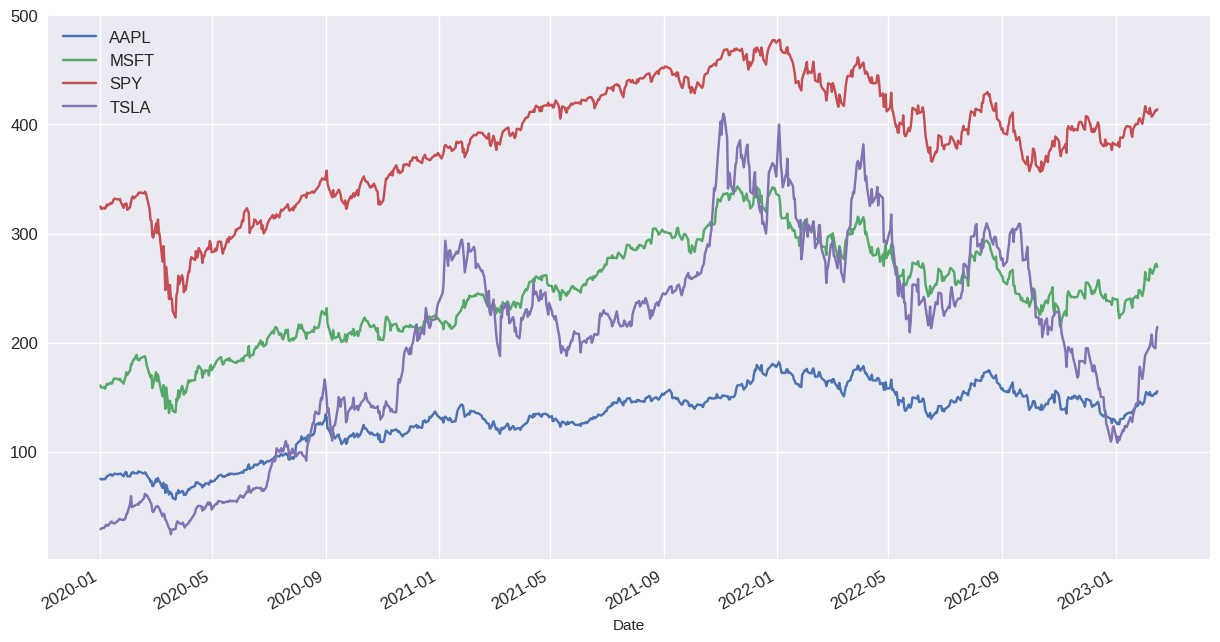

In [12]:
close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

We can normalize the stock prices using the `.div` method, by dividing all the prices by the first closing price, and then multiplying by 100. This way, all of the stocks will start at 100, so they can easily be compared. 

In [13]:
norm_close = close.div(close.iloc[0]).mul(100)

Now we plot the normalized closing prices:

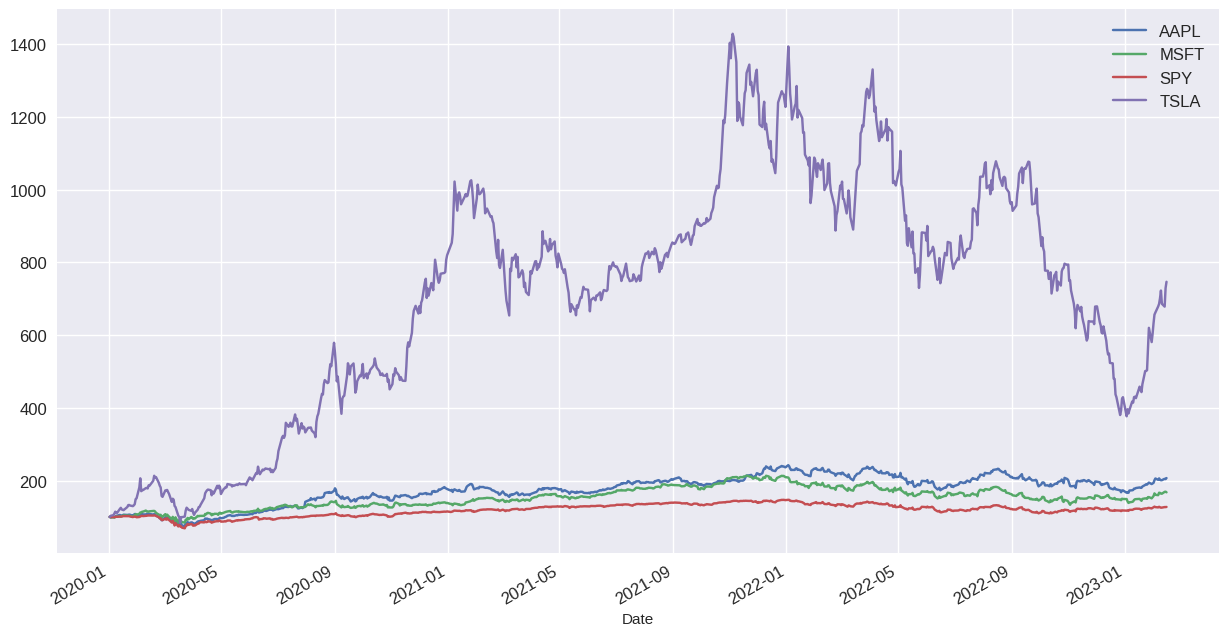

In [14]:
norm_close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

***
## Focusing on a Single Stock

We now focus on a single stock returns. We will focus on apple for this example. We will see some very useful database methods for manipulating the features and computing daily/monthly/yearly returns. 

In [15]:
aapl = close.AAPL.copy().to_frame()

## .to_frame() returns the data as a pandas dataframe
aapl

,AAPL
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501
...,...
2023-02-09,150.869995
2023-02-10,151.009995
2023-02-13,153.850006


### Daily Returns ###

To compute daily return changes, we can use of the `shift` method to move the datapoints and add them to a new column:

In [16]:
# create new column with datapoints shifted one day along
aapl["lag1"] = aapl.shift(periods=1)

# create new column with the differences between the daily closing prices using the .sub method
aapl["Diff"] = aapl.AAPL.sub(aapl.lag1)

# create new column with the percent daily returns
aapl["% Change"] = aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

# view new dataframe
aapl

,AAPL,lag1,Diff,% Change
Date,,,,
2020-01-02,75.087502,NaN,NaN,NaN
2020-01-03,74.357498,75.087502,-0.730003,-0.972204
2020-01-06,74.949997,74.357498,0.592499,0.796825
2020-01-07,74.597504,74.949997,-0.352493,-0.470305
2020-01-08,75.797501,74.597504,1.199997,1.608629
...,...,...,...,...
2023-02-09,150.869995,151.919998,-1.050003,-0.691155
2023-02-10,151.009995,150.869995,0.139999,0.092795
2023-02-13,153.850006,151.009995,2.840012,1.880678


Instead of `shift` and `sub` methods, we can also use the `diff` method to do it in one go:

In [17]:
aapl["Diff2"] = aapl.AAPL.diff(periods=1)

## compare Diff with Diff2
aapl

,AAPL,lag1,Diff,% Change,Diff2
Date,,,,,
2020-01-02,75.087502,NaN,NaN,NaN,NaN
2020-01-03,74.357498,75.087502,-0.730003,-0.972204,-0.730003
2020-01-06,74.949997,74.357498,0.592499,0.796825,0.592499
2020-01-07,74.597504,74.949997,-0.352493,-0.470305,-0.352493
2020-01-08,75.797501,74.597504,1.199997,1.608629,1.199997
...,...,...,...,...,...
2023-02-09,150.869995,151.919998,-1.050003,-0.691155,-1.050003
2023-02-10,151.009995,150.869995,0.139999,0.092795,0.139999
2023-02-13,153.850006,151.009995,2.840012,1.880678,2.840012


Likewise, instead of using the `div` method, we could have used the `pct_change` method for the percentage change. 

In [18]:
aapl["% Change 2"] = aapl.AAPL.pct_change(periods=1).mul(100)

# view the dataframe
aapl

,AAPL,lag1,Diff,% Change,Diff2,% Change 2
Date,,,,,,
2020-01-02,75.087502,NaN,NaN,NaN,NaN,NaN
2020-01-03,74.357498,75.087502,-0.730003,-0.972204,-0.730003,-0.972204
2020-01-06,74.949997,74.357498,0.592499,0.796825,0.592499,0.796825
2020-01-07,74.597504,74.949997,-0.352493,-0.470305,-0.352493,-0.470305
2020-01-08,75.797501,74.597504,1.199997,1.608629,1.199997,1.608629
...,...,...,...,...,...,...
2023-02-09,150.869995,151.919998,-1.050003,-0.691155,-1.050003,-0.691155
2023-02-10,151.009995,150.869995,0.139999,0.092795,0.139999,0.092795
2023-02-13,153.850006,151.009995,2.840012,1.880678,2.840012,1.880678


We can easily remove columns from the df once we have computed what we needed:

In [19]:
del aapl["Diff2"]
del aapl["lag1"]
del aapl["% Change"]

aapl

,AAPL,Diff,% Change 2
Date,,,
2020-01-02,75.087502,NaN,NaN
2020-01-03,74.357498,-0.730003,-0.972204
2020-01-06,74.949997,0.592499,0.796825
2020-01-07,74.597504,-0.352493,-0.470305
2020-01-08,75.797501,1.199997,1.608629
...,...,...,...
2023-02-09,150.869995,-1.050003,-0.691155
2023-02-10,151.009995,0.139999,0.092795
2023-02-13,153.850006,2.840012,1.880678


We can rename the columns like so:

In [20]:
aapl.rename(columns = {'% Change 2' : 'Change'}, inplace=True)

aapl

,AAPL,Diff,Change
Date,,,
2020-01-02,75.087502,NaN,NaN
2020-01-03,74.357498,-0.730003,-0.972204
2020-01-06,74.949997,0.592499,0.796825
2020-01-07,74.597504,-0.352493,-0.470305
2020-01-08,75.797501,1.199997,1.608629
...,...,...,...
2023-02-09,150.869995,-1.050003,-0.691155
2023-02-10,151.009995,0.139999,0.092795
2023-02-13,153.850006,2.840012,1.880678


### Resampling Data ###

Our current data is daily. To extract the closing price for the last day of each month, we can use the following:

In [21]:
aapl.AAPL.resample("M").last()

## last business day of the month
aapl.AAPL.resample("BM").last()

Date
2020-01-31     77.377502
2020-02-28     68.339996
2020-03-31     63.572498
2020-04-30     73.449997
2020-05-29     79.485001
2020-06-30     91.199997
2020-07-31    106.260002
2020-08-31    129.039993
2020-09-30    115.809998
2020-10-30    108.860001
2020-11-30    119.050003
2020-12-31    132.690002
2021-01-29    131.960007
2021-02-26    121.260002
2021-03-31    122.150002
2021-04-30    131.460007
2021-05-31    124.610001
2021-06-30    136.960007
2021-07-30    145.860001
2021-08-31    151.830002
2021-09-30    141.500000
2021-10-29    149.800003
2021-11-30    165.300003
2021-12-31    177.570007
2022-01-31    174.779999
2022-02-28    165.119995
2022-03-31    174.610001
2022-04-29    157.649994
2022-05-31    148.839996
2022-06-30    136.720001
2022-07-29    162.509995
2022-08-31    157.220001
2022-09-30    138.199997
2022-10-31    153.339996
2022-11-30    148.029999
2022-12-30    129.929993
2023-01-31    144.289993
2023-02-28    155.330002
Freq: BM, Name: AAPL, dtype: float64

This makes computing the monthly percentage returns very easy:

In [22]:
aapl.AAPL.resample("BM").last().pct_change(periods=1).mul(100)

Date
2020-01-31          NaN
2020-02-28   -11.679759
2020-03-31    -6.976146
2020-04-30    15.537377
2020-05-29     8.216479
2020-06-30    14.738625
2020-07-31    16.513164
2020-08-31    21.437974
2020-09-30   -10.252632
2020-10-30    -6.001206
2020-11-30     9.360649
2020-12-31    11.457370
2021-01-29    -0.550151
2021-02-26    -8.108521
2021-03-31     0.733960
2021-04-30     7.621781
2021-05-31    -5.210715
2021-06-30     9.910927
2021-07-30     6.498243
2021-08-31     4.092967
2021-09-30    -6.803663
2021-10-29     5.865727
2021-11-30    10.347129
2021-12-31     7.422870
2022-01-31    -1.571216
2022-02-28    -5.526950
2022-03-31     5.747339
2022-04-29    -9.713079
2022-05-31    -5.588327
2022-06-30    -8.142969
2022-07-29    18.863365
2022-08-31    -3.255180
2022-09-30   -12.097700
2022-10-31    10.955137
2022-11-30    -3.462891
2022-12-30   -12.227255
2023-01-31    11.052106
2023-02-28     7.651264
Freq: BM, Name: AAPL, dtype: float64

### Plotting Returns

We again compute the percentage returns but we drop `NaN` occurences, then we plot a histogram. For this block to work we must ensure the `aapl` dataframe has only one column, the closing price.

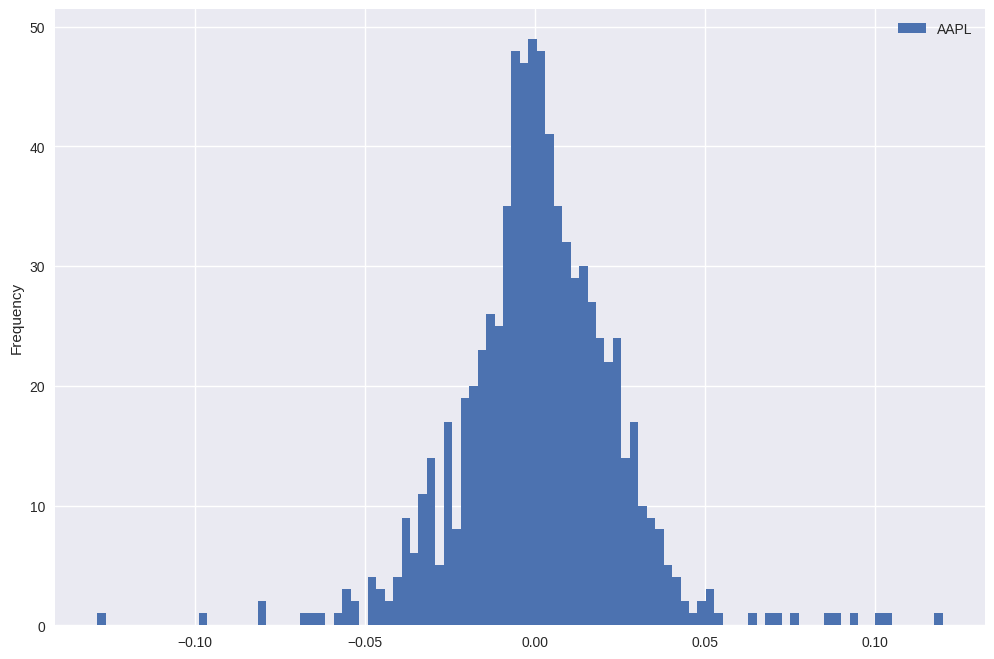

In [34]:
returns = aapl.pct_change().dropna()
returns.plot(kind="hist", figsize=(12,8), bins=100)
plt.show()

### Mean Returns 

Here we calculate the mean returns and the variance/std deviation.

In [37]:
daily_mean_returns = returns.mean()
daily_mean_returns

AAPL    0.00119
dtype: float64

In [38]:
var_daily = returns.var()
var_daily

AAPL    0.000531
dtype: float64

In [39]:
std_daily = np.sqrt(var_daily)
std_daily

AAPL    0.023051
dtype: float64

### Annual Mean Return

There are approx 252 trading days in a calendar year:

In [40]:
annual_mean_return = daily_mean_returns*252
annual_mean_return

AAPL    0.29998
dtype: float64

In [42]:
annual_var_return = var_daily*252
annual_std_return = std_daily*np.sqrt(252)

***
## Comparing More Stocks

We are going to load more stocks so that we can compare more features.

In [3]:
tickers = ["SPY", "AAPL", "IBM", "MSFT", "DISH", "AIG"]

In [4]:
stocks = yf.download(tickers, start="2018-01-01", end="2023-01-01")

[*********************100%***********************]  6 of 6 completed


In [5]:
close = stocks.loc[:,"Close"].copy()
norm_close = close.div(close.iloc[0]).mul(100)

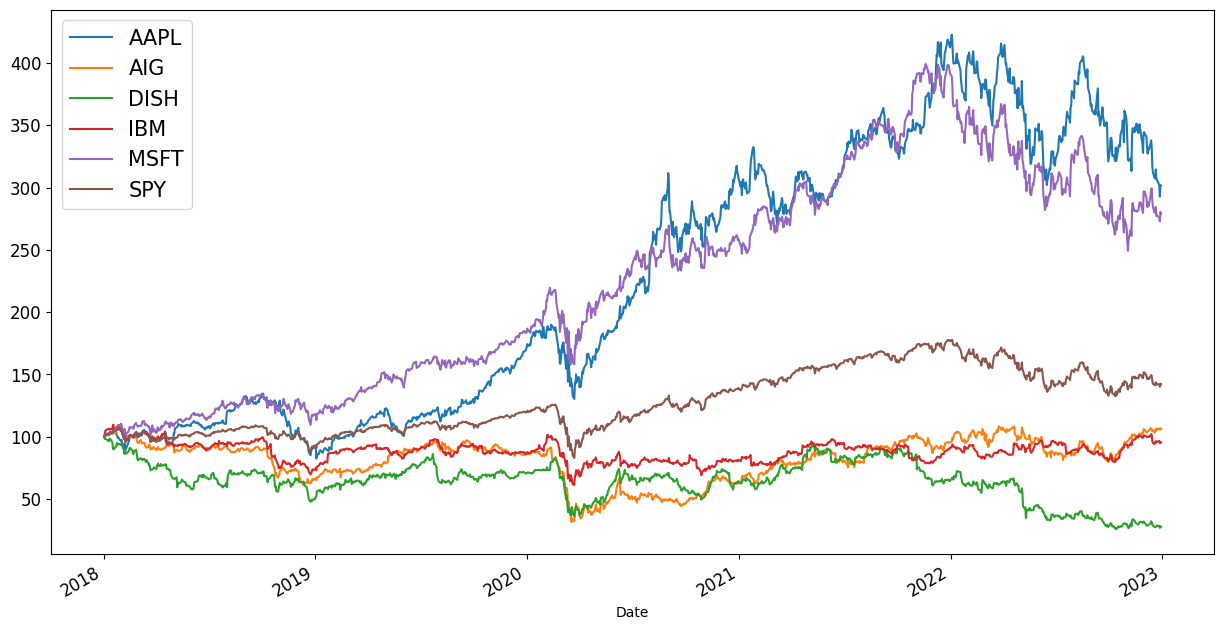

In [6]:
norm_close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=15)
plt.show()

In [51]:
returns = close.pct_change().dropna()
returns.head()

,AAPL,AIG,DISH,IBM,MSFT,SPY
Date,,,,,,
2020-01-03,-0.009722,-0.007728,0.003917,-0.007975,-0.012452,-0.007572
2020-01-06,0.007968,0.000779,-0.006689,-0.001787,0.002585,0.003815
2020-01-07,-0.004703,-0.005642,-0.002806,0.000671,-0.009118,-0.002812
2020-01-08,0.016086,0.011739,-0.001407,0.008346,0.015928,0.005330
2020-01-09,0.021241,0.011023,0.002536,0.010568,0.012493,0.006781
